In [ ]:
import numpy as np 
import scipy
from scipy import io
import torch
import matplotlib.pyplot as plt
import os
import tqdm
os.chdir('/content/drive/MyDrive/Colab Notebooks/deernet_data/deernet_sigmoid/sigmoid_18nov')
from torch.autograd.functional import jacobian

In [ ]:
!pip install onnx2torch
import onnx2torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 28.5 MB/s 
     |████████████████████████████████| 13.1 MB 48.3 MB/s 


In [ ]:
x = io.loadmat('x.mat')
x = torch.tensor(x['x'].T)

In [ ]:
# load network 
net = onnx2torch.convert('deernet_3.onnx')
def y(x): return net(x) 

# compute jacobian and base point
J = jacobian(y,x)
J = J[0,:,0,:]
f_0 = y(x) 

# save as mat file for descrambling 
io.savemat('layer_3.mat', {'J': J.numpy(), 'f0': f_0.numpy().reshape(256,)})

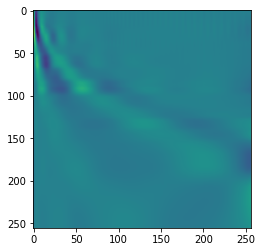

In [ ]:
plt.imshow(J)